In [399]:
import pandas as pd
import os
from itertools import combinations
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

## Merge 12 CSVs of sales data

In [400]:
path = 'Sales_Data/'

dfs = []
for i in os.listdir(path):
    df_x = pd.read_csv(path+i)
    dfs.append(df_x)
    
sales = pd.concat(dfs)    

In [401]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [15]:
#Save to new CSV
#sales.to_csv('ALL_SALES_DATA.csv')

## Read in new dataframe

In [16]:
sales = pd.read_csv('ALL_SALES_DATA.csv')

## Clean the data

In [402]:
sales.shape

(186850, 6)

In [34]:
# check for and drop nulls
sales.isna().sum()

Unnamed: 0            0
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [37]:
sales.dropna(inplace=True)

In [38]:
sales.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [26]:
# Need to convert some objects to numeric
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
 7   Month             186305 non-null  object
dtypes: int64(1), object(7)
memory usage: 11.4+ MB


In [40]:
# looks like there are multiple rows with the header strings as values
# These rows need to be dropped.
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

ValueError: Unable to parse string "Price Each" at position 254

In [45]:
# this creates a new dataframe with none of the extra header rows
sales = sales[sales['Price Each'] != 'Price Each']

## Find best month for sales and $ amount

In [46]:
sales.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month'],
      dtype='object')

In [18]:
# Split the order data column on the first slash to extract just the month number
new = sales['Order Date'].str.split('/', expand=True)

# make new column with just month itegers
sales['Month'] = new[0]

In [22]:
sales.head(2)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12


In [51]:
# make individual order value column (price*quantity)
# but first need to convert the columns to numeric 
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

# might be an error here
sales['Order Value'] = sales['Quantity Ordered'] * sales['Price Each']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [52]:
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [57]:
month_sales = sales.groupby('Month')['Order Value'].sum()
month_sales

Month
01    1.822257e+06
02    2.202022e+06
03    2.807100e+06
04    3.390670e+06
05    3.152607e+06
06    2.577802e+06
07    2.647776e+06
08    2.244468e+06
09    2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Order Value, dtype: float64

In [71]:
# convert to sci notation to float
# December shows to be the best month in terms of $ sales
print('%.02f' % month_sales[-1])

4613443.34


In [85]:
def no_sci(num):
    return float('%.02f' % num)

#apply function to series
month_sales = month_sales.apply(no_sci)

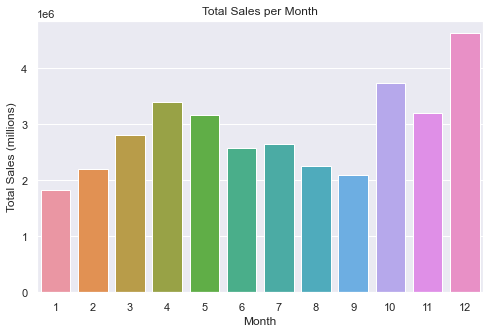

In [148]:
# Visualize
months = [i for i in range(1,13)]

plt.figure(figsize=(8,5))
sns.barplot(x=months, y=month_sales)
plt.title('Total Sales per Month')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Month');

## What City had the most sales?

In [90]:
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [93]:
# Split the purchase address column on the commas to isolate city
new = sales['Purchase Address'].str.split(',',2,expand=True)

# This could also be done using the apply method with lambda:
'''
sales['City'] = sales['Purchase Address'].apply(lambda x: x.split(',')[1])

In [99]:
new[1].unique()

array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

In [101]:
sales['City'] = new[1].str.lstrip()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
# Using groupby to find city with most sales
sales_by_city = pd.DataFrame(sales.groupby('City')['Order Value'].sum())
sales_by_city.reset_index(inplace=True)
sales_by_city

,City,Order Value
0,Atlanta,2.795499e+06
1,Austin,1.819582e+06
2,Boston,3.661642e+06
3,Dallas,2.767975e+06
4,Los Angeles,5.452571e+06
5,New York City,4.664317e+06
6,Portland,2.320491e+06
7,San Francisco,8.262204e+06
8,Seattle,2.747755e+06


In [132]:
# Answer: San Fransisco
print('$' + '%.02f' % sales_by_city.iloc[7])

$8262203.91


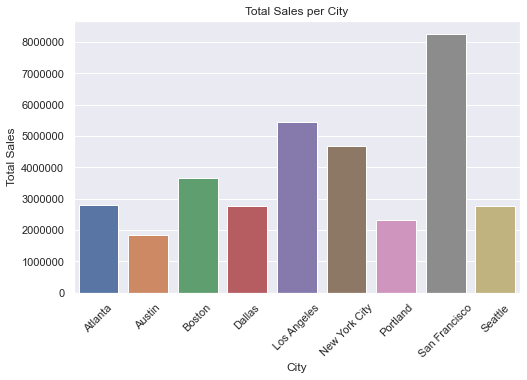

In [160]:
# Plot sale ans city without scientific notation

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_city['City'], y=sales_by_city['Order Value'])

plt.title('Total Sales per City')
plt.ylabel('Total Sales');
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

## What time should we display advertisements to maximize the likelihood of customer's buying product?

In [167]:
# convert the date information from string to datetime object
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [174]:
# Make columns with more granular date information

sales['Hour'] = sales['Order Date'].dt.hour
sales['Minute'] = sales['Order Date'].dt.minute

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [175]:
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City,Hour,Minute
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


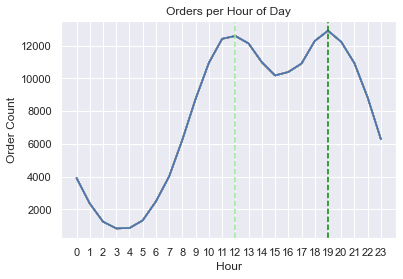

In [216]:
# Plot (line chart) the count of order for each hour
plt.plot(sales.groupby('Hour').count())
plt.xticks(sales.Hour.unique())
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.title('Orders per Hour of Day')

# add markers to highlight best times
# second best time: 12:00
plt.axvline(12, 0, 1, ls='--', c = 'lightgreen')

# best time: 19:00
plt.axvline(19, 0, 1, ls='--', c = 'green');

In [227]:
# Find the hour with the most sales (dollar total)

sales_hour = pd.DataFrame(sales.groupby('Hour')['Order Value'].sum())
sales_hour.reset_index(inplace=True)
sales_hour.sort_values('Order Value', ascending=False).head(3)

,Hour,Order Value
19,19,2412938.54
12,12,2316821.34
11,11,2300610.24


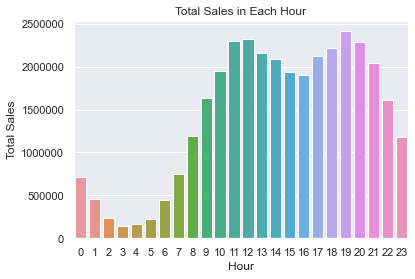

In [240]:
# Plot this information for all hours

sns.barplot(x='Hour', y='Order Value', data=sales_hour)
plt.ylabel('Total Sales')
plt.ticklabel_format(style = 'plain', axis='y')
plt.title('Total Sales in Each Hour');

## What is the best time for sales FOR EACH city?

In [311]:
# populate dict by grouping by each city and order count,
# then find the index (hour in this case) with highest value

best_hour_city = dict()

for city in sales.City.unique():
    best_hour_city[city] = sales[sales['City'] == city].groupby('Hour')['Order ID'].count().idxmax()

In [312]:
# Here are the best hours of the day for sales for each city
best_hour_city

{'New York City': 19,
 'San Francisco': 19,
 'Atlanta': 19,
 'Portland': 19,
 'Dallas': 13,
 'Los Angeles': 11,
 'Boston': 19,
 'Austin': 19,
 'Seattle': 12}

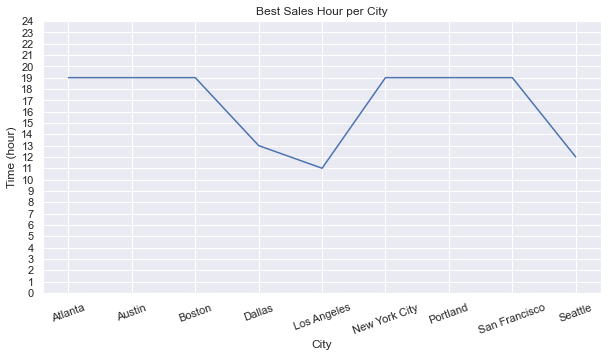

In [409]:
# Quick viz
plt.figure(figsize=(10,5))

sns.lineplot(x=list(best_hour_city.keys()), y=list(best_hour_city.values()))
plt.xticks(rotation=20)
plt.ylabel('Time (hour)')
plt.yticks(range(0,25))
plt.xlabel('City')
plt.title('Best Sales Hour per City');

## What products are most often sold together?

In [245]:
# isolate all order with more than one item
multi_item_orders = sales[sales['Order ID'].duplicated(keep=False)]

# group the unique orders togethers
multi_item_orders['Grouped'] = multi_item_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [247]:
# Grouped column has been created, but duplicate rows now need to be drop
multi_item_orders.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City,Hour,Minute,Grouped
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,32,"Vareebadd Phone,USB-C Charging Cable"


In [249]:
multi_item_orders = multi_item_orders.drop_duplicates('Order ID')
multi_item_orders.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City,Hour,Minute,Grouped
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,32,"Vareebadd Phone,USB-C Charging Cable"
42,42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin,12,27,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston,14,49,"iPhone,Lightning Charging Cable"
76,76,295735,iPhone,1,700.00,2019-12-22 18:25:00,"374 Lincoln St, New York City, NY 10001",12,700.00,New York City,18,25,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [253]:
# new df with only relevent information for this task

df = multi_item_orders[['Order ID', 'Grouped']]
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [278]:
# Create counter object and count the number of desired combinations that occured

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [280]:
# Here are the 5 most frequently combined products in an order
count.most_common()[0:5]

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

## What product sold the most and why do you think so?

In [355]:
product_group = sales.groupby('Product')['Quantity Ordered'].sum()
product_group

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

Text(0.5, 1.0, 'Order Quantity Per Product')

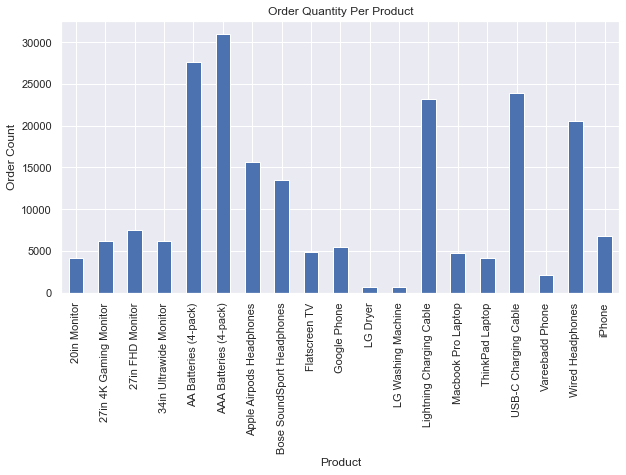

In [361]:
# Quick viz
plt.figure(figsize=(10,5))
product_group.plot(kind='bar')
plt.ylabel('Order Count')
plt.title('Order Quantity Per Product')

In [362]:
# ANSWER: AAA Batteries

# Buy why?:
# Could be because batteries are cheap and are often purchased with
# other items that need them. We can add validity to this assumption with another viz.

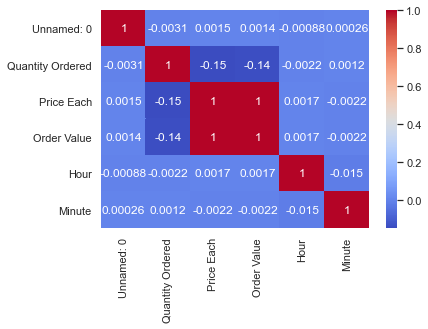

In [372]:
# We can see that 'Price Each' and 'Quantity Ordered' are negatively correlated
sns.heatmap(sales.corr(), cmap='coolwarm', annot=True);

In [367]:
# Lets overlay the price with the previously created bar chart to extract more info. 
prices = sales.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [380]:
# Converting the product_group series to DataFrame
prod_quant = pd.DataFrame(product_group).reset_index()

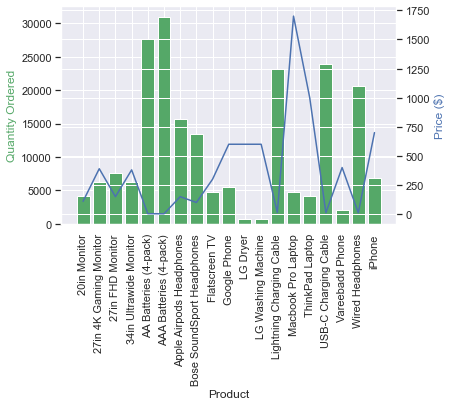

In [397]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
ax.bar(prod_quant['Product'], prod_quant['Quantity Ordered'], color = 'g')
ax2.plot(prod_quant['Product'],prices,'b-')

ax.set_xlabel('Product')
ax.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax.set_xticklabels(prod_quant['Product'], rotation=90);

In [398]:
# Indeed, low price tends to result in higher order quantity and vice versa.